In [2]:
import cv2
import matplotlib.pyplot as plt

org_image = cv2.cvtColor(cv2.imread('033120_HT_covid-cat_feat-1028x579.jpeg'), cv2.COLOR_BGR2RGB)

In [3]:
def show_image(image):
  plt.figure(figsize=(8, 8))
  plt.imshow(image)
  plt.axis('off')

(579, 1028, 3)

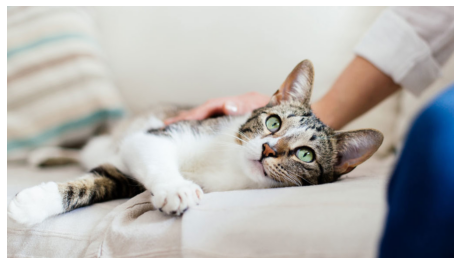

In [4]:
show_image(org_image)

org_image.shape

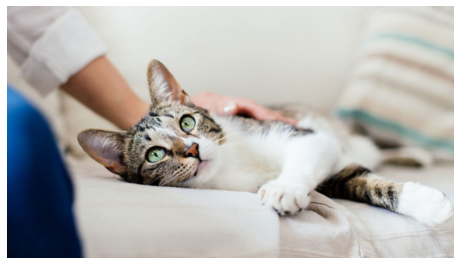

In [5]:
import albumentations as A

augmentor = A.HorizontalFlip(p=0.5)
aug_image  = augmentor(image=org_image)['image']
show_image(aug_image)

In [6]:
def show_images(images, labels, ncols=4, title=None):
  figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
  for i in range(ncols):
    axs[i].imshow(images[i])
    axs[i].set_title(labels[i])

def repeat_aug(count=4, org_image=None, label=None, augmentor=None):
  image_list = [org_image]
  label_list = ['original']

  for i in range(count):
    aug_image = augmentor(image=org_image)['image']
    image_list.append(aug_image)
    label_list.append(label)

  show_images(image_list, label_list, ncols=count+1)

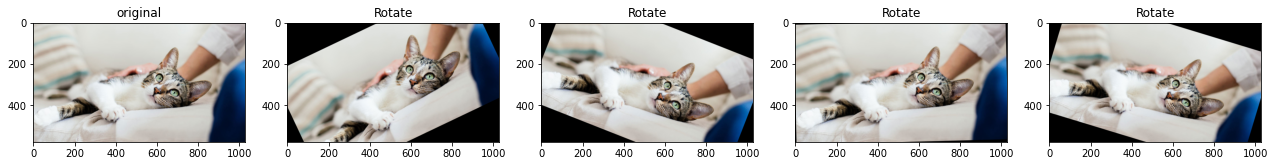

In [7]:
augmentor = A.Rotate(limit=90, p=1, border_mode=cv2.BORDER_CONSTANT)
repeat_aug(count=4, org_image=org_image, label='Rotate', augmentor=augmentor)

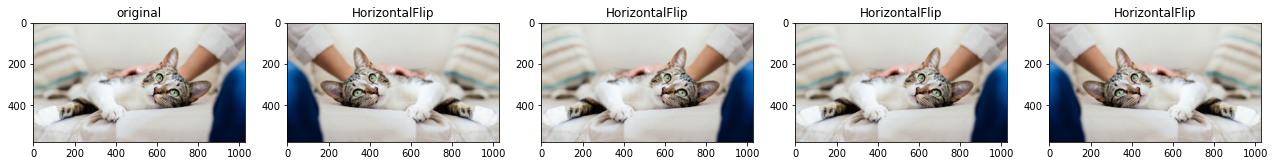

In [8]:
augmentor = A.HorizontalFlip(p=0.5)

repeat_aug(count=4, org_image=org_image, label='HorizontalFlip', augmentor=augmentor)

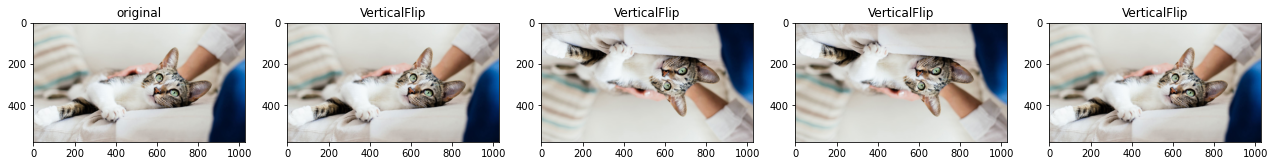

In [9]:
augmentor = A.VerticalFlip(p=0.5)

repeat_aug(count=4, org_image=org_image, label='VerticalFlip', augmentor=augmentor)

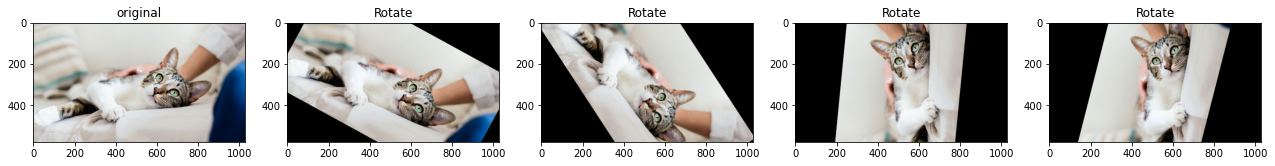

In [10]:
augmentor = A.Rotate(limit=90, p=1, border_mode=cv2.BORDER_CONSTANT)

repeat_aug(count=4, org_image=org_image, label='Rotate', augmentor=augmentor)

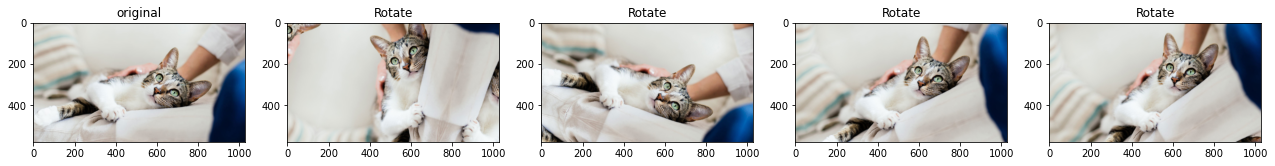

In [11]:
augmentor = A.Rotate(limit=90, p=1, border_mode=cv2.BORDER_REFLECT)

repeat_aug(count=4, org_image=org_image, label='Rotate', augmentor=augmentor)

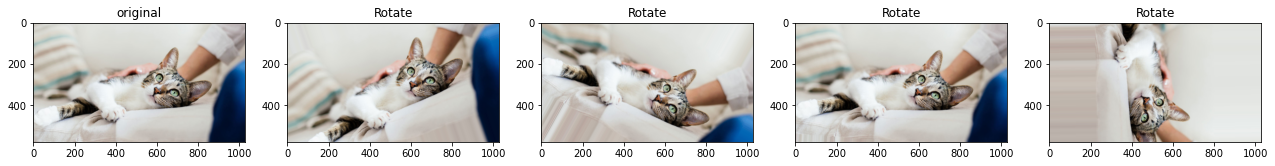

In [12]:
augmentor = A.Rotate(limit=90, p=1, border_mode=cv2.BORDER_REPLICATE)

repeat_aug(count=4, org_image=org_image, label='Rotate', augmentor=augmentor)

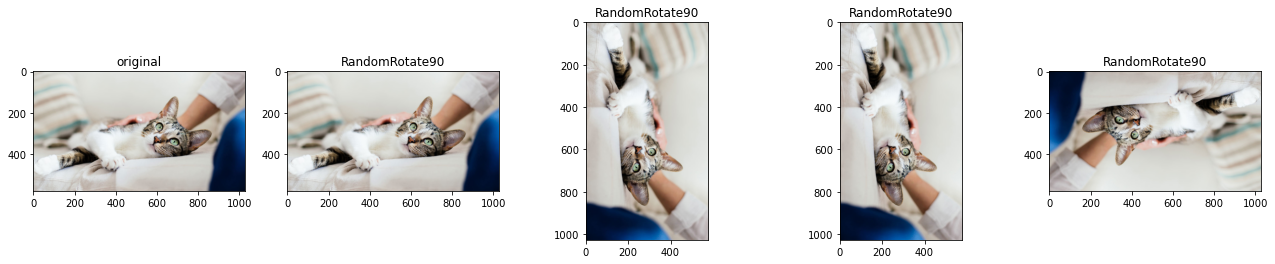

In [13]:
augmentor = A.RandomRotate90(p=1)

repeat_aug(count=4, org_image=org_image, label='RandomRotate90', augmentor=augmentor)

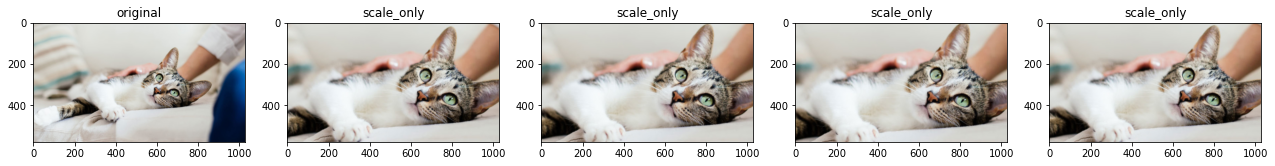

In [14]:
augmentor = A.ShiftScaleRotate(shift_limit=0, scale_limit=(0.5, 1.0), rotate_limit=0, p=1)
repeat_aug(count=4, org_image=org_image, label='scale_only', augmentor=augmentor)

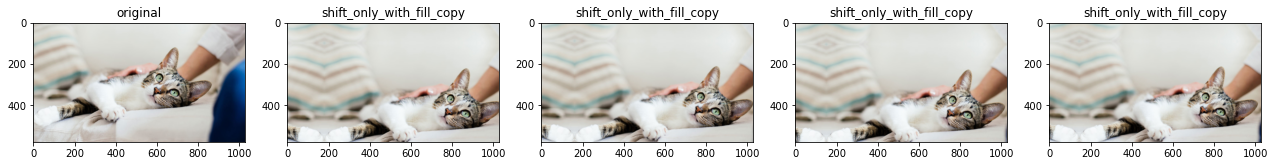

In [15]:
augmentor = A.ShiftScaleRotate(shift_limit=(0.2, 0.1), scale_limit=0, rotate_limit=0, p=1)
repeat_aug(count=4, org_image=org_image, label='shift_only_with_fill_copy', augmentor=augmentor)

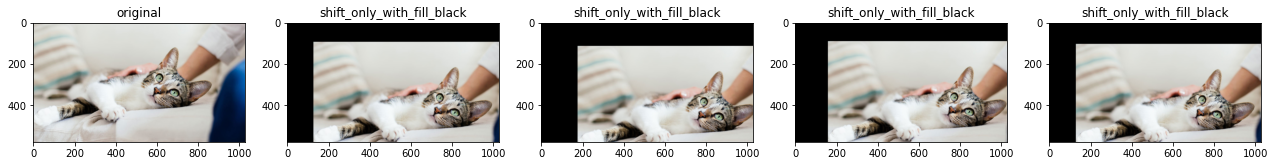

In [16]:
augmentor = A.ShiftScaleRotate(shift_limit=(0.2, 0.1), scale_limit=0, rotate_limit=0, border_mode=cv2.BORDER_CONSTANT,p=1)
repeat_aug(count=4, org_image=org_image, label='shift_only_with_fill_black', augmentor=augmentor)

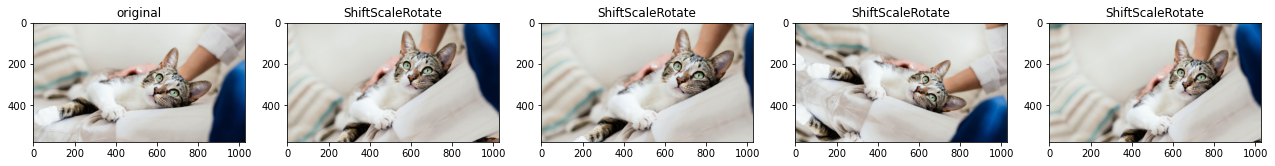

In [17]:
augmentor = A.ShiftScaleRotate(p=1)
repeat_aug(count=4, org_image=org_image, label='ShiftScaleRotate', augmentor=augmentor)

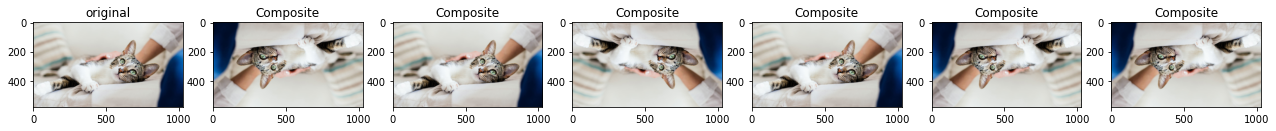

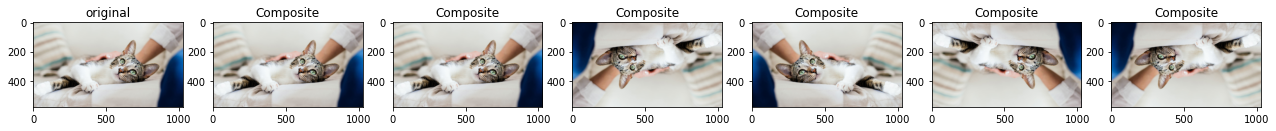

In [18]:
augmentor = A.Compose([
  A.VerticalFlip(p=0.5),
  A.HorizontalFlip(p=0.5)
])

repeat_aug(count=6, org_image=org_image, label='Composite', augmentor=augmentor)
repeat_aug(count=6, org_image=org_image, label='Composite', augmentor=augmentor)

'crop image size: (400, 400, 3)'

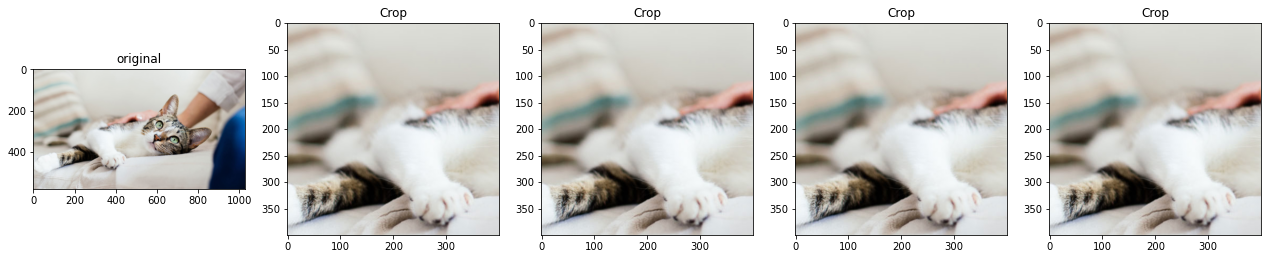

In [19]:
augmentor = A.Crop(x_min=100, y_min=100, x_max=500, y_max=500, p=1)
aug_image = augmentor(image=org_image)['image']
repeat_aug(count=4, org_image=org_image, label='Crop', augmentor=augmentor)

f'crop image size: {aug_image.shape}'

'crop image size: (579, 1028, 3)'

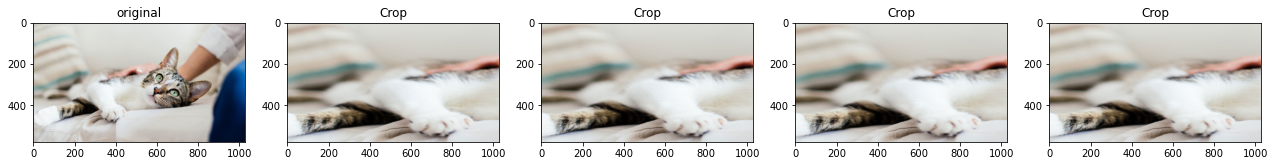

In [20]:
augmentor = A.Compose([
  A.Crop(x_min=100, y_min=100, x_max=500, y_max=500, p=1),
  A.Resize(579, 1028)
])
aug_image = augmentor(image=org_image)['image']
repeat_aug(count=4, org_image=org_image, label='Crop', augmentor=augmentor)

f'crop image size: {aug_image.shape}'

'crop image size: (300, 500, 3)'

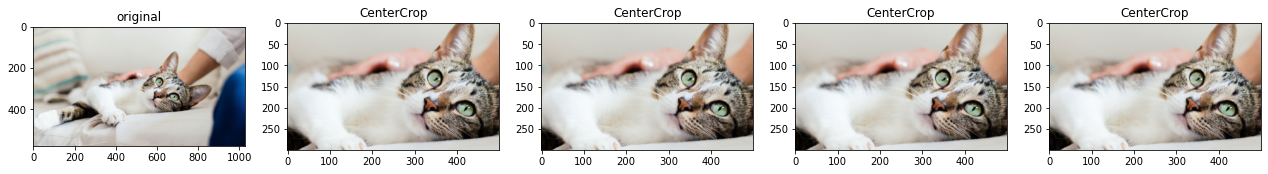

In [21]:
augmentor = A.CenterCrop(height=300, width=500, p=1)
aug_image = augmentor(image=org_image)['image']
repeat_aug(count=4, org_image=org_image, label='CenterCrop', augmentor=augmentor)

f'crop image size: {aug_image.shape}'

'crop image size: (579, 1028, 3)'

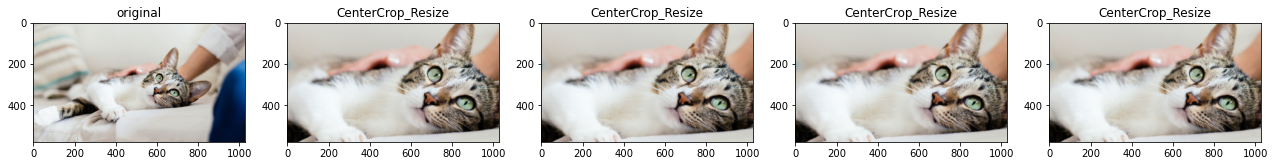

In [22]:
augmentor = A.Compose([
  A.CenterCrop(height=300, width=500, p=1),
  A.Resize(579, 1028)
])
aug_image = augmentor(image=org_image)['image']
repeat_aug(count=4, org_image=org_image, label='CenterCrop_Resize', augmentor=augmentor)

f'crop image size: {aug_image.shape}'

'crop image size: (400, 800, 3)'

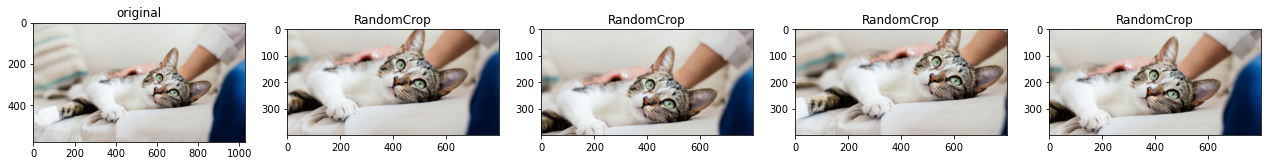

In [23]:
augmentor = A.RandomCrop(height=400, width=800, p=1)
aug_image = augmentor(image=org_image)['image']
repeat_aug(count=4, org_image=org_image, label='RandomCrop', augmentor=augmentor)
f'crop image size: {aug_image.shape}'

'crop image size: (579, 1028, 3)'

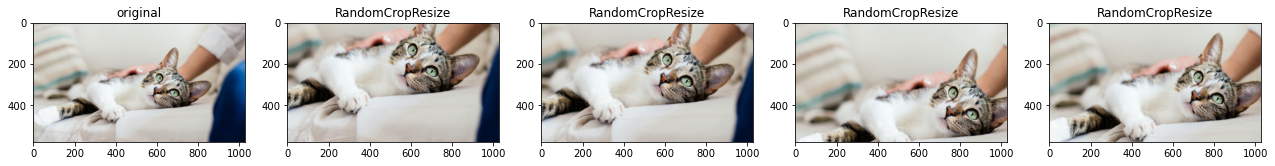

In [24]:
augmentor = A.Compose([
  A.RandomCrop(height=400, width=800, p=1),
  A.Resize(height=579, width=1028)
])
aug_image = augmentor(image=org_image)['image']
repeat_aug(count=4, org_image=org_image, label='RandomCropResize', augmentor=augmentor)
f'crop image size: {aug_image.shape}'

'crop image size: (579, 1028, 3)'

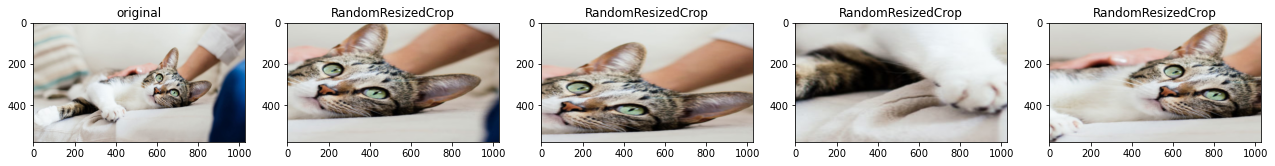

In [25]:
augmentor = A.RandomResizedCrop(height=579, width=1028)
aug_image = augmentor(image=org_image)['image']
repeat_aug(count=4, org_image=org_image, label='RandomResizedCrop', augmentor=augmentor)

f'crop image size: {aug_image.shape}'

'crop image size: (579, 1028, 3)'

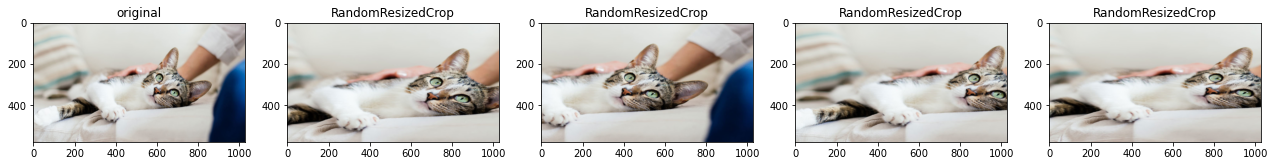

In [26]:
augmentor = A.RandomResizedCrop(height=579, width=1028, scale=(0.5, 0.9), p=1)
aug_image = augmentor(image=org_image)['image']
repeat_aug(count=4, org_image=org_image, label='RandomResizedCrop', augmentor=augmentor)

f'crop image size: {aug_image.shape}'

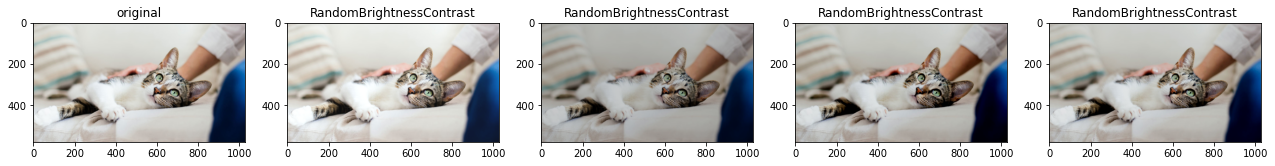

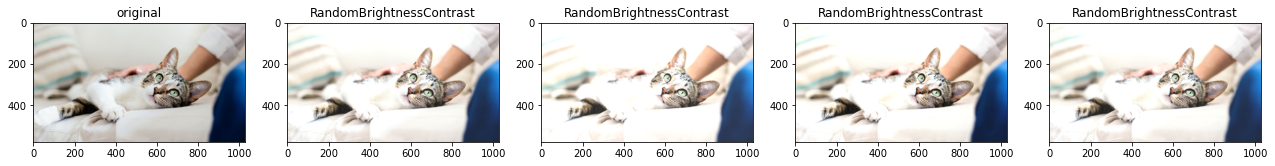

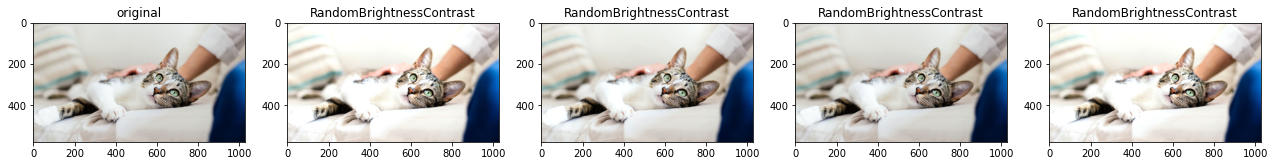

In [27]:
augmentor = A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=1)
repeat_aug(count=4, org_image=org_image, label='RandomBrightnessContrast', augmentor=augmentor)

augmentor = A.RandomBrightnessContrast(brightness_limit=(0, 0.2), contrast_limit=(0, 0.2), p=1)
repeat_aug(count=4, org_image=org_image, label='RandomBrightnessContrast', augmentor=augmentor)

augmentor = A.RandomBrightnessContrast(brightness_limit=0, contrast_limit=(0, 0.2), p=1)
repeat_aug(count=4, org_image=org_image, label='RandomBrightnessContrast', augmentor=augmentor)

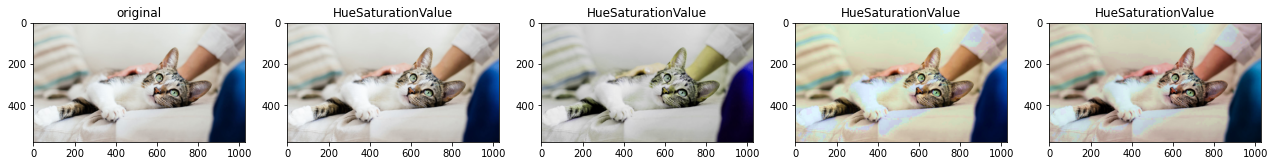

In [28]:
augmentor = A.HueSaturationValue(p=1)
repeat_aug(count=4, org_image=org_image, label='HueSaturationValue', augmentor=augmentor)

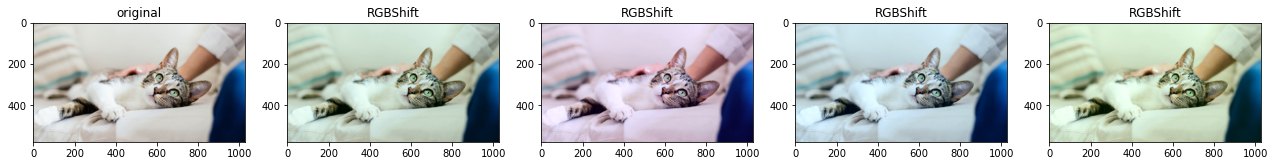

In [29]:
augmentor = A.RGBShift(p=1)
repeat_aug(count=4, org_image=org_image, label='RGBShift', augmentor=augmentor)

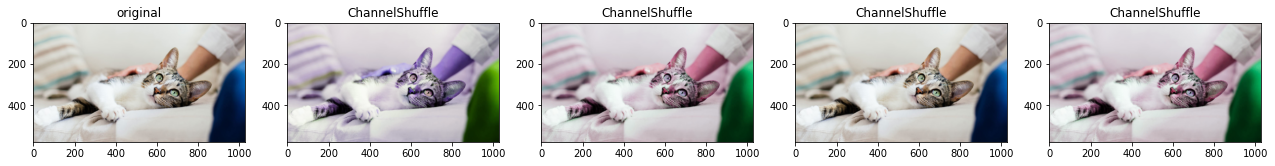

In [30]:
augmentor = A.ChannelShuffle(p=1)
repeat_aug(count=4, org_image=org_image, label='ChannelShuffle', augmentor=augmentor)

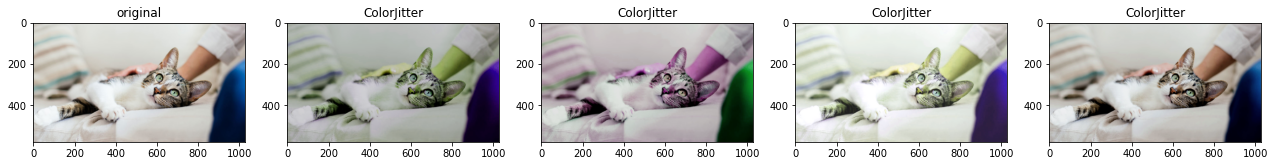

In [31]:
augmentor = A.ColorJitter(p=1)
repeat_aug(count=4, org_image=org_image, label='ColorJitter', augmentor=augmentor)

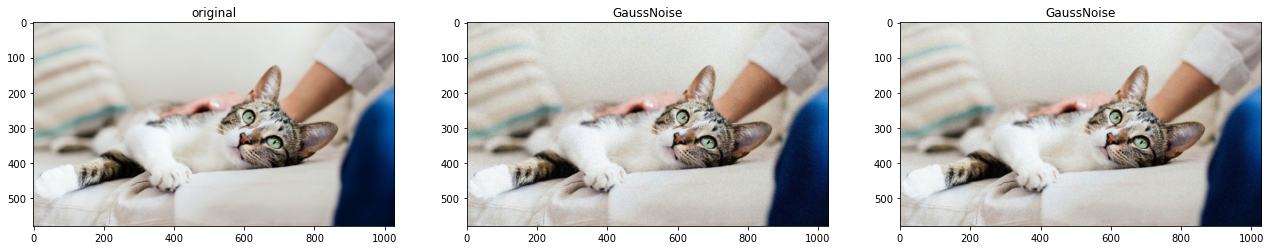

In [32]:
augmentor = A.GaussNoise(p=1, var_limit=(100, 200))

repeat_aug(count=2, org_image=org_image, label='GaussNoise', augmentor=augmentor)

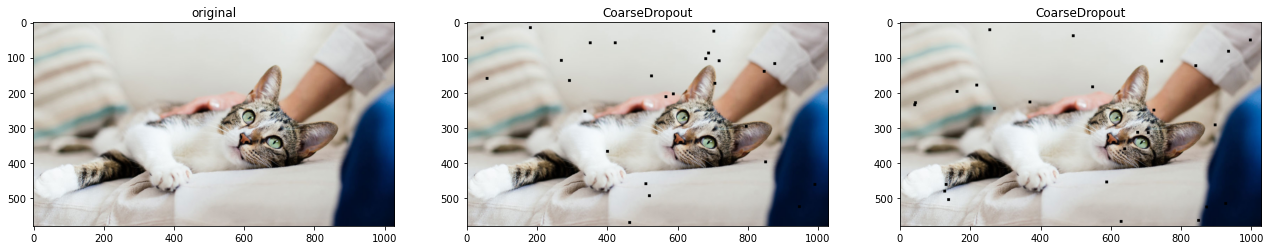

In [37]:
augmentor = A.CoarseDropout(p=1, max_holes=26)

repeat_aug(count=2, org_image=org_image, label='CoarseDropout', augmentor=augmentor)

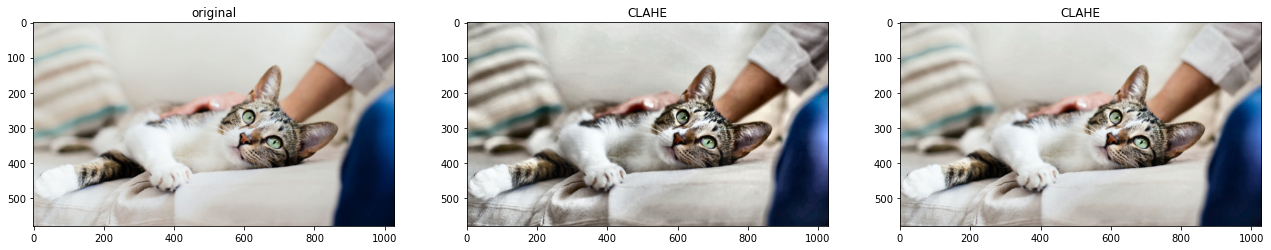

In [38]:
augmentor = A.CLAHE(p=1, clip_limit=4)

repeat_aug(count=2, org_image=org_image, label='CLAHE', augmentor=augmentor)

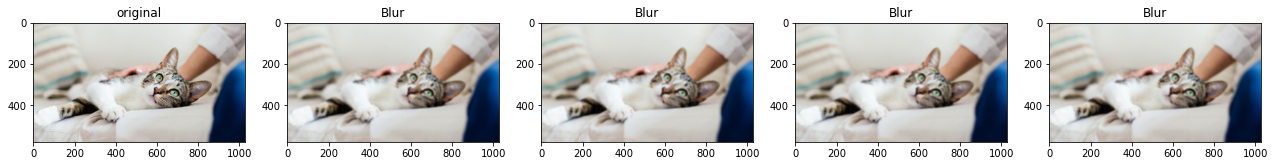

In [39]:
augmentor = A.Blur(p=1, blur_limit=(7, 10))

repeat_aug(count=4, org_image=org_image, label='Blur', augmentor=augmentor)

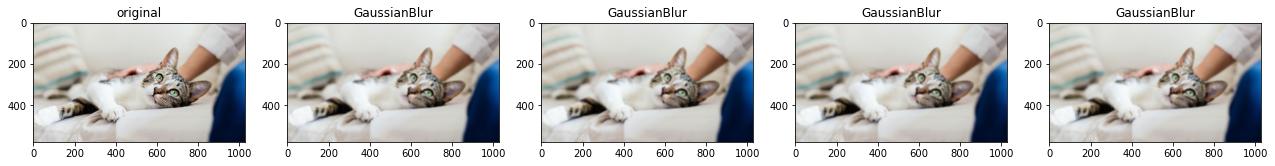

In [40]:
augmentor = A.GaussianBlur(p=1, blur_limit=(11, 15))

repeat_aug(count=4, org_image=org_image, label='GaussianBlur', augmentor=augmentor)

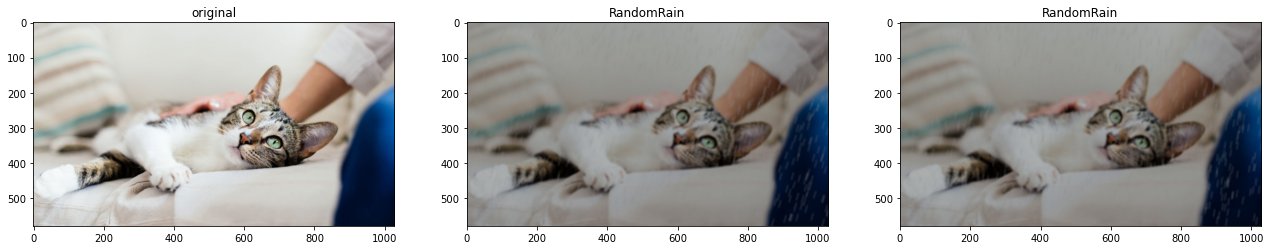

In [41]:
augmentor = A.RandomRain(p=1)

repeat_aug(count=2, org_image=org_image, label='RandomRain', augmentor=augmentor)

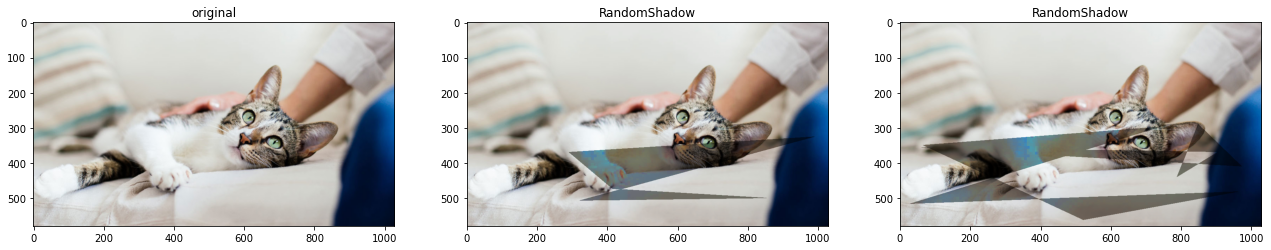

In [42]:
augmentor = A.RandomShadow(p=1)

repeat_aug(count=2, org_image=org_image, label='RandomShadow', augmentor=augmentor)

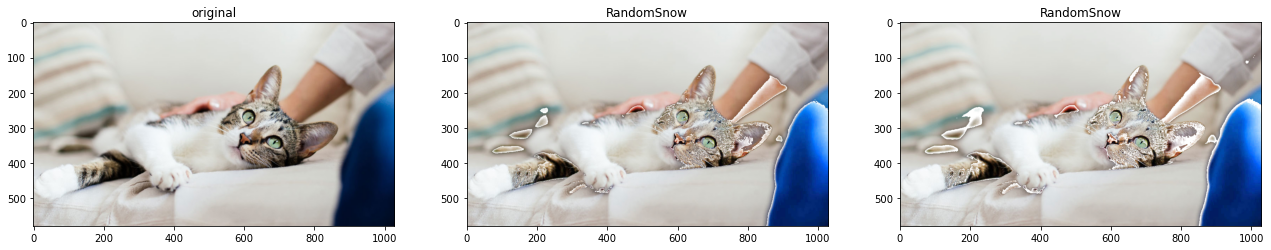

In [43]:
augmentor = A.RandomSnow(p=1)

repeat_aug(count=2, org_image=org_image, label='RandomSnow', augmentor=augmentor)

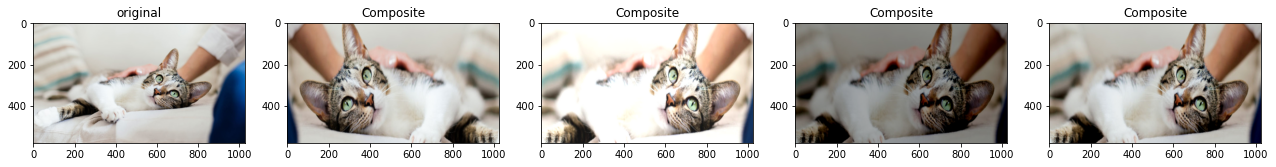

In [44]:
augmentor = A.Compose([
  A.CenterCrop(height=300, width=800),
  A.HorizontalFlip(p=0.5),
  A.RandomBrightnessContrast(p=0.5),
  A.Resize(579, 1024, p=1)
])

repeat_aug(count=4, org_image=org_image, label='Composite', augmentor=augmentor)

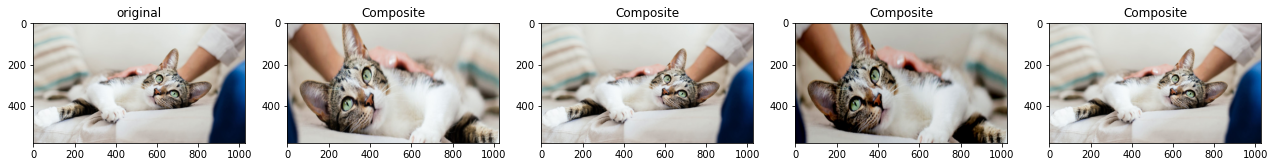

In [45]:
augmentor = A.Compose([
  A.CenterCrop(height=300, width=800, p=1.0),
  A.HorizontalFlip(p=0.5),
  A.RandomBrightnessContrast(p=0.5),
  A.Resize(579, 1024, p=1.0)
], p=0.5)

repeat_aug(count=4, org_image=org_image, label='Composite', augmentor=augmentor)

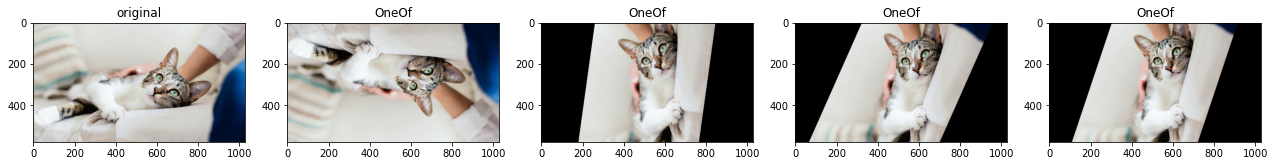

In [46]:
augmentor = A.OneOf([
  A.VerticalFlip(p=1),
  A.HorizontalFlip(p=1),
  A.Rotate(limit=(45, 90), p=1, border_mode=cv2.BORDER_CONSTANT)
], p=1)

repeat_aug(count=4, org_image=org_image, label='OneOf', augmentor=augmentor)

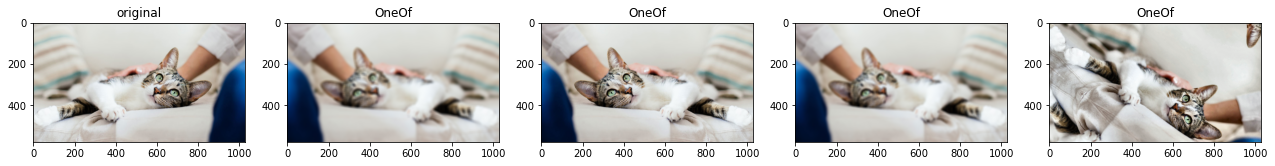

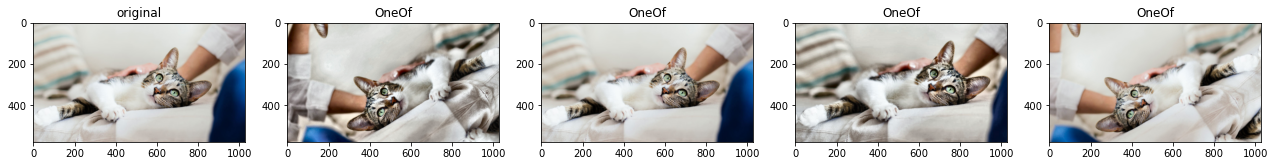

In [47]:
augmentor = A.Compose([
  A.HorizontalFlip(p=0.5),
  A.ShiftScaleRotate(p=0.5),
  A.OneOf([
    A.CLAHE(p=0.3),
    A.Blur(blur_limit=(10, 15), p=0.3)
  ], p=0.5)
])

repeat_aug(count=4, org_image=org_image, label='OneOf', augmentor=augmentor)
repeat_aug(count=4, org_image=org_image, label='OneOf', augmentor=augmentor)